<h1 style="text-align:center;">K-Means Clustering</h1>
<p style="text-align:center;">
Nazar Khan
<br>CVML Lab
<br>University of The Punjab
</p>

K-Means clustering is an unsupervised learning technique used to group data points into K clusters based on feature similarity. Here’s a simple PyTorch-based tutorial for implementing K-Means clustering.

The K-Means algorithm:
1. Randomly initializes K cluster centroids.
2. Assigns each data point to the nearest centroid.
3. Updates centroids as the mean of assigned points.
4. Repeats steps 2–3 until convergence.

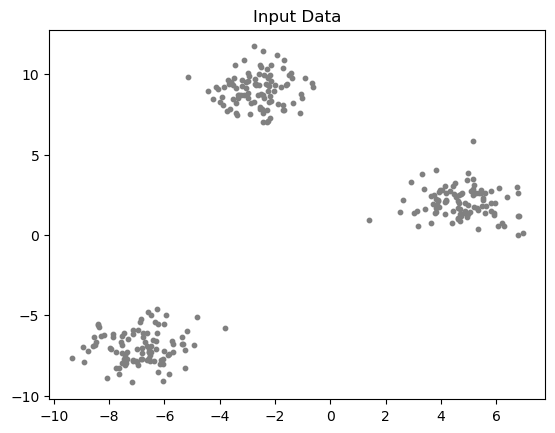

Converged after 1 iterations.


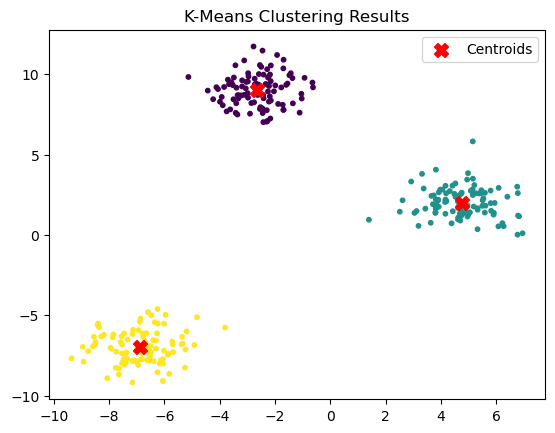

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate 2D Data
n_samples = 300
n_features = 2
n_clusters = 3
data, labels = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)
data = torch.tensor(data, dtype=torch.float)

# Plot the data
plt.scatter(data[:, 0], data[:, 1], c='gray', s=10)
plt.title("Input Data")
plt.show()

# Initialize centroids randomly
def initialize_centroids(data, k):
    indices = torch.randperm(data.size(0))[:k]
    return data[indices]

# Assign each point to the nearest centroid
def assign_clusters(data, centroids):
    distances = torch.cdist(data, centroids)  # Compute pairwise distances
    return torch.argmin(distances, dim=1)

# Update centroids as the mean of assigned points
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) == 0:
            # Handle empty clusters by reinitializing the centroid
            new_centroid = data[torch.randint(0, data.size(0), (1,))]
        else:
            new_centroid = cluster_points.mean(dim=0)
        new_centroids.append(new_centroid)
    return torch.stack(new_centroids)

# K-Means Algorithm
def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    prev_centroids = centroids.clone()
    
    for iteration in range(max_iters):
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        
        # Convergence check
        if torch.all(torch.abs(centroids - prev_centroids) < tol):
            print(f"Converged after {iteration} iterations.")
            break
        prev_centroids = centroids.clone()
    
    return centroids, clusters

# Run K-Means
k = 3
centroids, clusters = kmeans(data, k)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=clusters.numpy(), s=10, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()


### Automatic Estimation of K

To estimate the number of clusters (\(K\)) automatically, you can use techniques like the **Elbow Method** or **Silhouette Score**. Here’s how these methods can be implemented:

---

#### Approach 1: Elbow Method

The Elbow Method evaluates the clustering performance for different values of \(K\) by calculating the **inertia** (sum of squared distances between points and their centroids). The optimal \(K\) is at the "elbow" of the curve, where increasing \(K\) no longer significantly reduces the inertia.



In [6]:
def calculate_inertia(data, centroids, clusters):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        inertia += ((cluster_points - centroid) ** 2).sum().item()
    return inertia

def find_optimal_k(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        inertia = calculate_inertia(data, centroids, clusters)
        inertias.append(inertia)
    
    # Plot the inertia values to visualize the "elbow"
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia")
    plt.show()

    # Calculate the second derivative (rate of change of the slope)
    first_derivative = torch.tensor(inertias[:-1]) - torch.tensor(inertias[1:])
    second_derivative = first_derivative[:-1] - first_derivative[1:]

    # Find the index of the maximum second derivative
    optimal_k = torch.argmax(second_derivative).item() + 2  # +2 because of indexing offset
    return optimal_k, inertias

---

#### Approach 2: Silhouette Score

The Silhouette Score measures how similar a point is to its cluster compared to other clusters. The score ranges from -1 to 1, where 1 indicates well-separated clusters.



In [7]:
def silhouette_score(data, clusters):
    from sklearn.metrics import silhouette_score
    return silhouette_score(data.numpy(), clusters.numpy())

def find_optimal_k_silhouette(data, max_k=10):
    scores = []
    for k in range(2, max_k + 1):  # Silhouette score is undefined for k=1
        centroids, clusters = kmeans(data, k)
        score = silhouette_score(data, clusters)
        scores.append(score)
    
    # Plot the silhouette scores
    plt.plot(range(2, max_k + 1), scores, marker='o')
    plt.title("Silhouette Method for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.show()
    
    optimal_k = 2 + scores.index(max(scores))  # Add 2 since the range starts at 2
    return optimal_k


---

### Full Code with Automatic \(K\) Estimation

Here’s how the methods integrate with the existing K-Means implementation:



Converged after 1 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 5 iterations.
Converged after 9 iterations.
Converged after 10 iterations.
Converged after 5 iterations.
Converged after 9 iterations.
Converged after 13 iterations.
Converged after 16 iterations.


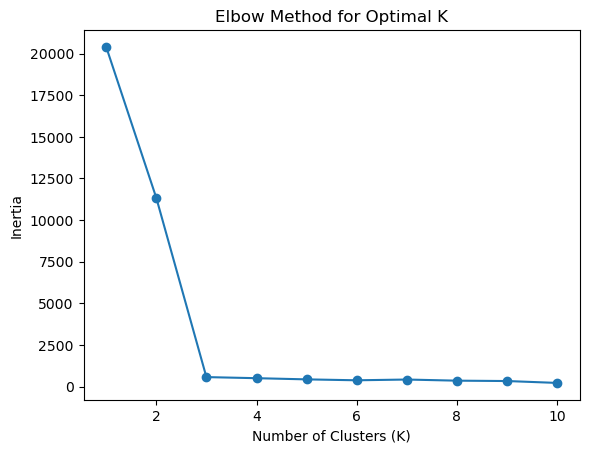

Converged after 3 iterations.
Converged after 3 iterations.
Converged after 7 iterations.
Converged after 5 iterations.
Converged after 7 iterations.
Converged after 12 iterations.
Converged after 8 iterations.
Converged after 14 iterations.
Converged after 7 iterations.


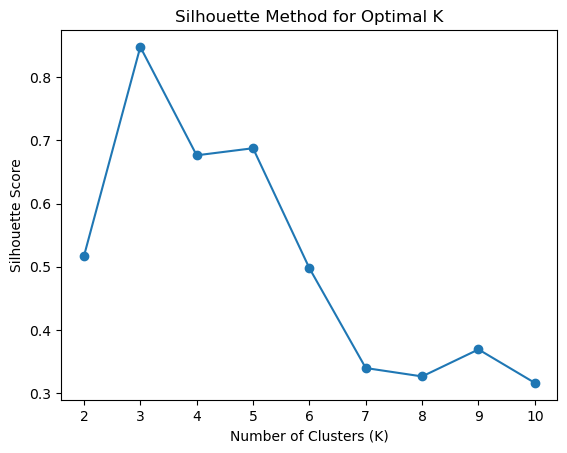

Optimal K (Elbow): 3
Optimal K (Silhouette): 3
Converged after 2 iterations.


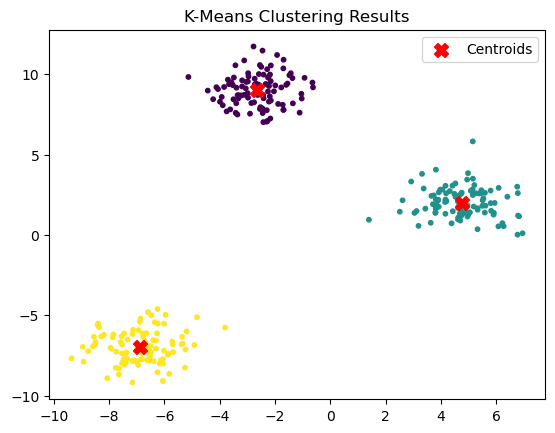

In [8]:

# Find optimal K using Elbow Method
optimal_k_elbow, inertias = find_optimal_k(data, max_k=10)

# Find optimal K using Silhouette Method
optimal_k_silhouette = find_optimal_k_silhouette(data, max_k=10)

print(f"Optimal K (Elbow): {optimal_k_elbow}")
print(f"Optimal K (Silhouette): {optimal_k_silhouette}")

# Run K-Means with the estimated K
centroids, clusters = kmeans(data, optimal_k_silhouette)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=clusters.numpy(), s=10, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

---

### Output:
- **Elbow Plot**: A curve showing the inertia vs. \(K\). You can pick the "elbow" point manually or via 2nd-derivative.
- **Silhouette Plot**: A curve showing the silhouette scores. The peak indicates the optimal \(K\).

These methods provide a principled way to estimate \(K\) before running the K-Means algorithm.